Loading the Dataset, Helper Functions and Preprocessing


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%matplotlib inline

In [ ]:
#Importing the necessary libraries
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras import regularizers, layers, Model
import scipy.io
from scipy.signal import find_peaks
import pickle
from tensorflow.keras import backend as K

In [ ]:
import sys
# Add the path to your Python files to the system path
# WARNING: Each person has different file path!!!
sys.path.append('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project')
# sys.path.append('/content/drive/MyDrive/CEE286_Project/')

# Now you can import your Python files
import preprocessing as PP

['load_mat_files_to_dfs', 'get_stats', 'convert_to_fft', 'normalize', 'find_peaks', 'segment_signals', 'generate_spectrogram']


In [ ]:
# List functions in preprocessing module
pp_functions = [func for func in dir(PP) if callable(getattr(PP, func))]
print("Functions pp:", pp_functions)


Functions pp: ['convert_to_fft', 'find_peaks', 'generate_segment_labels', 'generate_spectrogram', 'get_speed', 'get_stats', 'load_mat_files_to_dfs', 'normalize', 'segment_signals', 'spectrogram']


In [ ]:
#RUN THIS DIRECTLY For Future Use This Directly Instead of running the segmentation again
undamaged_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy')
damaged_1_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy')
damaged_2_segments_df = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy')

# undamaged_segments_df = np.load('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/undamaged_segmented_window_2000_step_400.npy')
# damaged_1_segments_df = np.load("/content/drive/MyDrive/CEE286_Project/segmented_npy_files/damaged_1_segmented_window_1000_step_400.npy")
# damaged_2_segments_df = np.load('/content/drive/MyDrive/CEE286_Project/segmented_npy_files/damaged_2_segmented_window_1000_step_400.npy')


print("Undamaged Segments DF Shape:", undamaged_segments_df.shape)
print("Damaged 1 Segments DF Shape:", damaged_1_segments_df.shape)
print("Damaged 2 Segments DF Shape:", damaged_2_segments_df.shape)


Undamaged Segments DF Shape: (2000, 6478)
Damaged 1 Segments DF Shape: (2000, 5666)
Damaged 2 Segments DF Shape: (2000, 5658)


In [ ]:
#Speed Labels
undamaged_speed_labels = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/speeds_npy_file/undamaged_speed_labels.npy')
damaged_1_speed_labels = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/speeds_npy_file/damaged_1_speed_labels.npy')
damaged_2_speed_labels = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/speeds_npy_file/damaged_2_speed_labels.npy')

print("Undamaged Speed Labels Shape:", undamaged_speed_labels.shape)
print("Damaged 1 Speed Labels Shape:", damaged_1_speed_labels.shape)
print("Damaged 2 Speed Labels Shape:", damaged_2_speed_labels.shape)

Undamaged Speed Labels Shape: (6478,)
Damaged 1 Speed Labels Shape: (5666,)
Damaged 2 Speed Labels Shape: (5658,)


In [ ]:
undamaged_speed_labels = undamaged_speed_labels.reshape(-1, 1)
damaged_1_speed_labels = damaged_1_speed_labels.reshape(-1, 1)
damaged_2_speed_labels = damaged_2_speed_labels.reshape(-1, 1)

undamaged_speed_labels = undamaged_speed_labels.T
damaged_1_speed_labels = damaged_1_speed_labels.T
damaged_2_speed_labels = damaged_2_speed_labels.T

print("Undamaged Speed Labels Shape:", undamaged_speed_labels.shape)
print("Damaged 1 Speed Labels Shape:", damaged_1_speed_labels.shape)
print("Damaged 2 Speed Labels Shape:", damaged_2_speed_labels.shape)


Undamaged Speed Labels Shape: (1, 6478)
Damaged 1 Speed Labels Shape: (1, 5666)
Damaged 2 Speed Labels Shape: (1, 5658)


In [ ]:
undamaged_spectrograms = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/undamaged_spectrograms_w_500_o_400.npy')
damaged_1_spectrograms = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/damaged_1_spectrograms_w_500_o_400.npy')
damaged_2_spectrograms = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/damaged_2_spectrograms_w_500_o_400.npy')

f_undamaged = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/f_undamaged_w_500_o_400.npy')
f_damaged_1 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/f_damaged_1_w_500_o_400.npy')
f_damaged_2 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/f_damaged_2_w_500_o_400.npy')

t_undamaged = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/t_undamaged_w_500_o_400.npy')
t_damaged_1 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/t_damaged_1_w_500_o_400.npy')
t_damaged_2 = np.load('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/segmented_spectrograms/t_damaged_2_w_500_o_400.npy')

print("Undamaged Spectrograms Shape:", undamaged_spectrograms.shape)
print("Damaged 1 Spectrograms Shape:", damaged_1_spectrograms.shape)
print("Damaged 2 Spectrograms Shape:", damaged_2_spectrograms.shape)

Undamaged Spectrograms Shape: (250, 16, 6478)
Damaged 1 Spectrograms Shape: (250, 16, 5666)
Damaged 2 Spectrograms Shape: (250, 16, 5658)


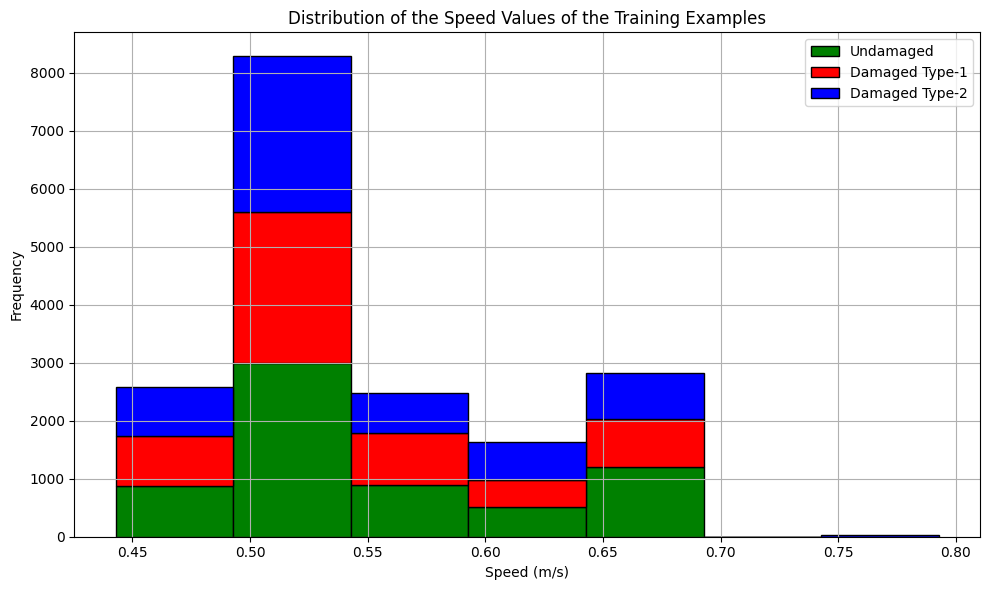

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the arrays to ensure they're 1D
undamaged_speed_labels = undamaged_speed_labels.reshape(-1)
damaged_1_speed_labels = damaged_1_speed_labels.reshape(-1)
damaged_2_speed_labels = damaged_2_speed_labels.reshape(-1)

# Combine the datasets into a list for stacking
data = [undamaged_speed_labels, damaged_1_speed_labels, damaged_2_speed_labels]

# Determine common bin edges across all datasets
all_speed_labels = np.concatenate(data)
bin_edges = np.arange(np.min(all_speed_labels), np.max(all_speed_labels) + 0.05, 0.05)

# Plot the stacked histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bin_edges, stacked=True, label=['Undamaged', 'Damaged Type-1', 'Damaged Type-2'],
         color=['green', 'red', 'blue'], edgecolor='black')

# Formatting the plot
plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.title('Distribution of the Speed Values of the Training Examples')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
undamaged_speed_labels = undamaged_speed_labels.reshape(-1, 1)
damaged_1_speed_labels = damaged_1_speed_labels.reshape(-1, 1)
damaged_2_speed_labels = damaged_2_speed_labels.reshape(-1, 1)

undamaged_speed_labels = undamaged_speed_labels.T
damaged_1_speed_labels = damaged_1_speed_labels.T
damaged_2_speed_labels = damaged_2_speed_labels.T

print("Undamaged Speed Labels Shape:", undamaged_speed_labels.shape)
print("Damaged 1 Speed Labels Shape:", damaged_1_speed_labels.shape)
print("Damaged 2 Speed Labels Shape:", damaged_2_speed_labels.shape)


Undamaged Speed Labels Shape: (1, 6478)
Damaged 1 Speed Labels Shape: (1, 5666)
Damaged 2 Speed Labels Shape: (1, 5658)


In [ ]:
type(undamaged_spectrograms)

numpy.ndarray

<ipython-input-24-e6340ea1fd67>:3: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t_undamaged, f_undamaged, undamaged_spectrograms[:, :, 15], shading='gourand')


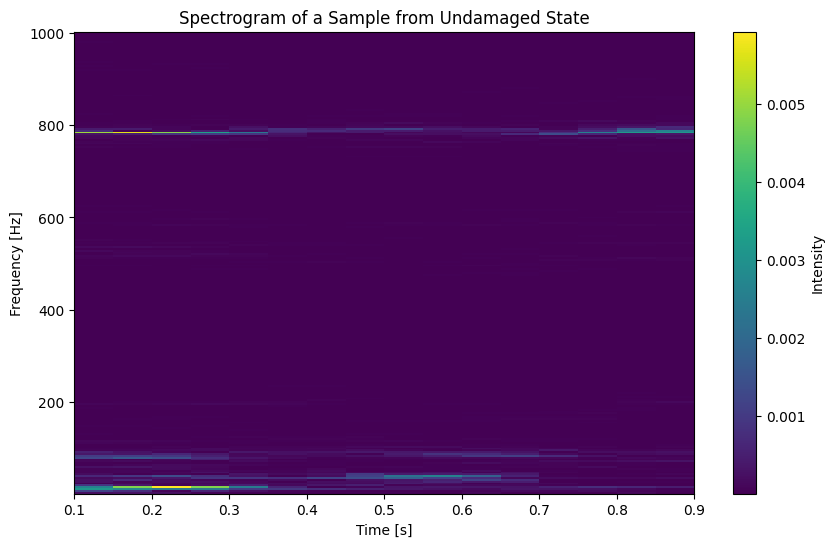

In [ ]:
# Plot the spectrogram of the first sample
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_undamaged, f_undamaged, undamaged_spectrograms[:, :, 15], shading='gourand')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of a Sample from Undamaged State')
plt.colorbar(label='Intensity')
plt.show()

<ipython-input-25-2f97c62aaea3>:3: UserWarning: shading value 'gourand' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(t_damaged_2, f_damaged_2, damaged_2_spectrograms[:, :, 5], shading='gourand')


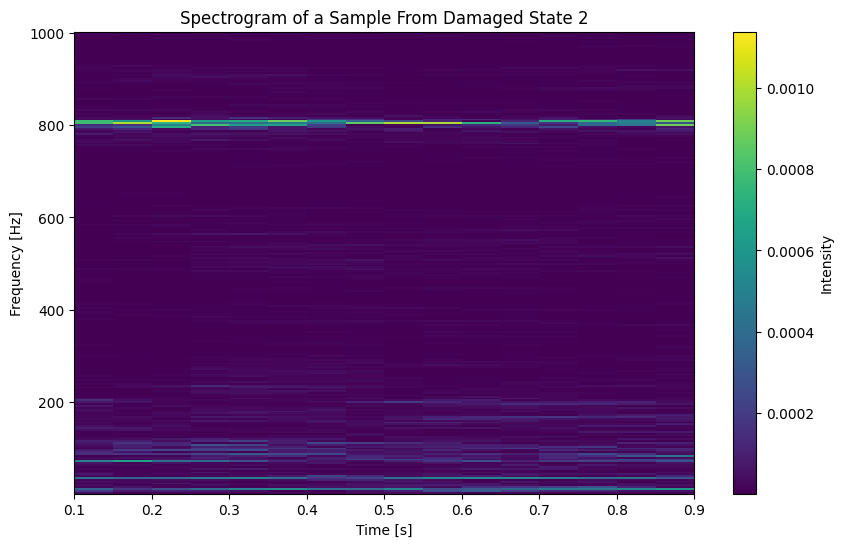

In [ ]:
# Plot the spectrogram of the first sample
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_damaged_2, f_damaged_2, damaged_2_spectrograms[:, :, 5], shading='gourand')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of a Sample From Damaged State 2')
plt.colorbar(label='Intensity')
plt.show()

In [ ]:
# # Convert the NumPy arrays to pandas DataFrames
# undamaged_spectrograms_df = pd.DataFrame(undamaged_spectrograms)
# damaged_1_spectrograms_df = pd.DataFrame(damaged_1_spectrograms)
# damaged_2_spectrograms_df = pd.DataFrame(damaged_2_spectrograms)


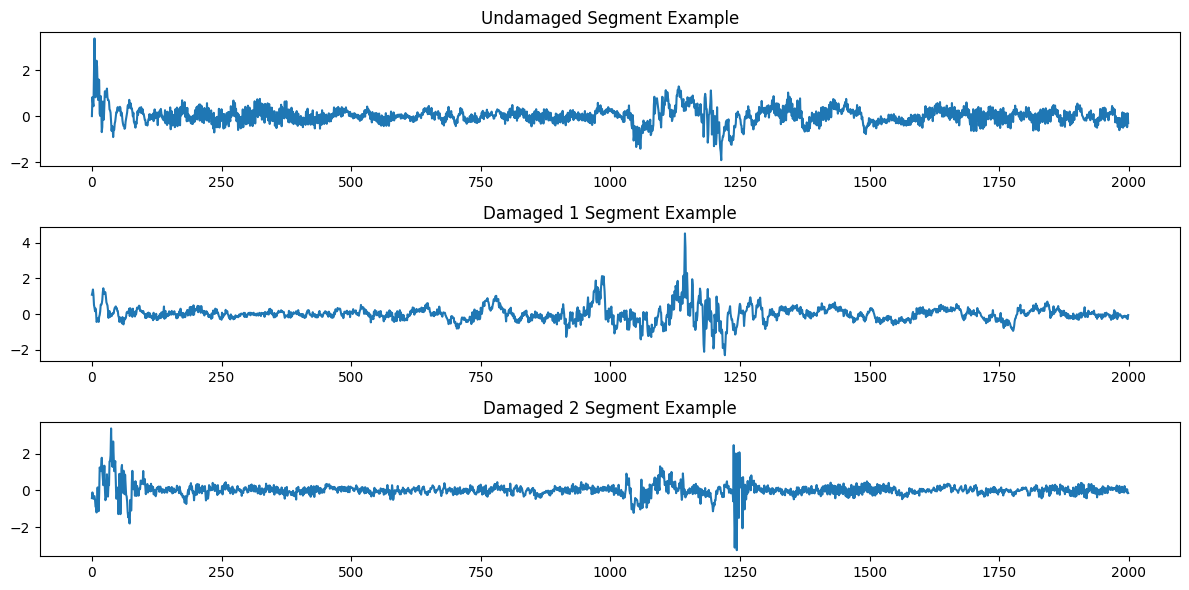

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(undamaged_segments_df[:,1])
plt.title('Undamaged Segment- Single Sample')

plt.subplot(3, 1, 2)
plt.plot(damaged_1_segments_df[:,1])
plt.title('Damaged 1 Segment Example')

plt.subplot(3, 1, 3)
plt.plot(damaged_2_segments_df[:,1])
plt.title('Damaged 2 Segment Single Sample')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Undamaged Segment- Single Sample')

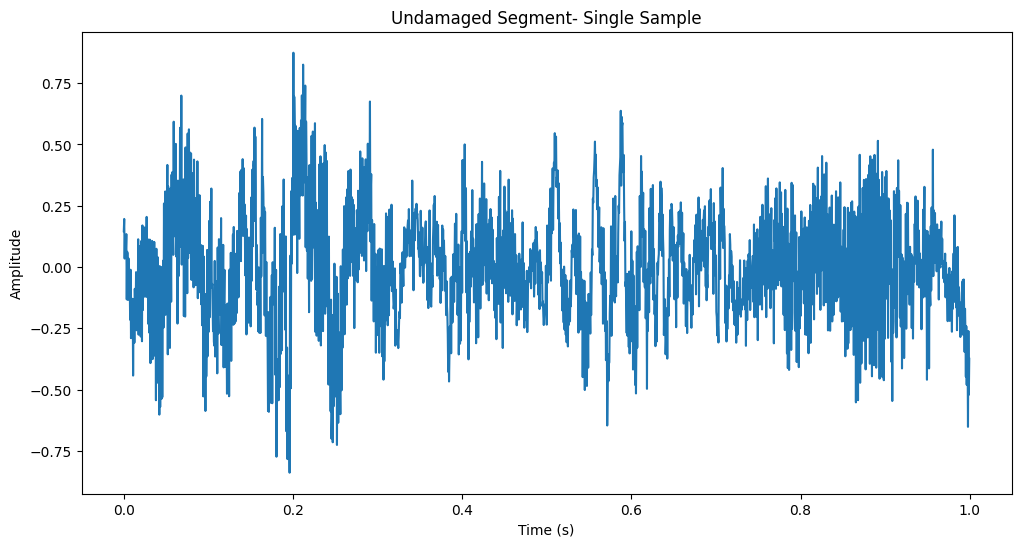

In [ ]:
plt.figure(figsize=(12, 6))
time = np.arange(0, 1, 1/2000)
plt.plot(time , undamaged_segments_df[:,15])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Undamaged Segment- Single Sample')

Text(0.5, 1.0, 'Damaged Segment- Single Sample')

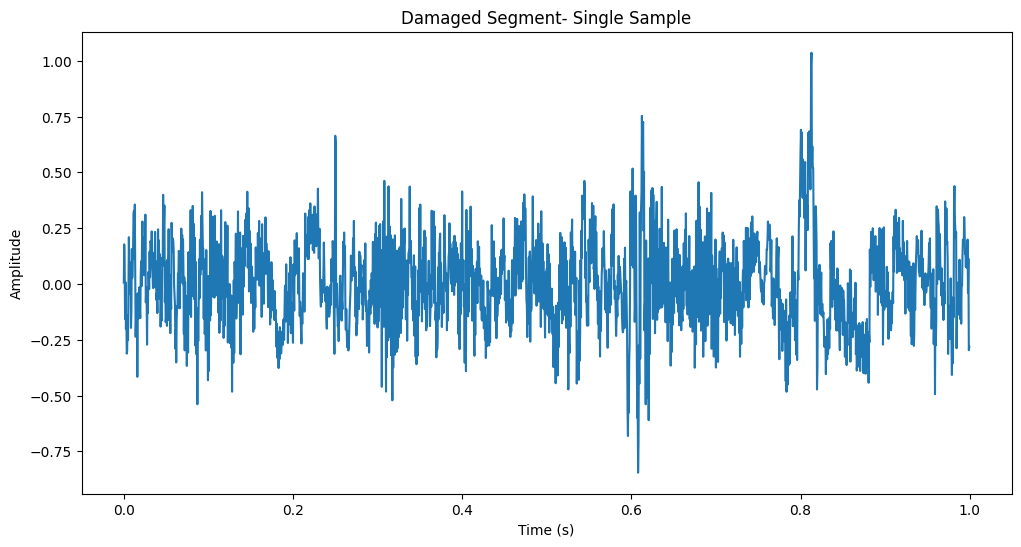

In [ ]:
plt.figure(figsize=(12, 6))
time = np.arange(0, 1, 1/2000)
plt.plot(time , damaged_2_segments_df[:,10])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Damaged Segment- Single Sample')

In [ ]:
#Concatenate along the sample axis (axis=2) for merged input
merged_spectrograms = np.concatenate((undamaged_spectrograms, damaged_1_spectrograms, damaged_2_spectrograms), axis=2)
print("Merged Spectrograms Shape:", merged_spectrograms.shape)


Merged Spectrograms Shape: (250, 16, 17802)


In [ ]:
merged_speed_labels = np.concatenate((undamaged_speed_labels, damaged_1_speed_labels, damaged_2_speed_labels),axis =1)
merged_speed_labels = merged_speed_labels.T
print("Merged Speed Labels Shape:", merged_speed_labels.shape)


Merged Speed Labels Shape: (17802, 1)


In [ ]:
#Actual Outputs (1,17802) = (1, 6478+5666+5658)

# Single Output where 0 is for Undamaged and 1 is for Damaged
undamaged = np.zeros((1, undamaged_spectrograms.shape[2]))
damaged_1 = np.ones((1, damaged_1_spectrograms.shape[2]))
damaged_2 = np.ones((1, damaged_2_spectrograms.shape[2]))

actual_outputs = np.concatenate((undamaged, damaged_1, damaged_2), axis=1)
#Check
print(actual_outputs[0, 0], actual_outputs[0, 6476], actual_outputs[0, 6477], actual_outputs[0, 6478], actual_outputs[0, 6479], actual_outputs[0, 6480], actual_outputs[0, 17801] )

actual_outputs = actual_outputs.T
print(actual_outputs.shape)

0.0 0.0 0.0 1.0 1.0 1.0 1.0
(17802, 1)


In [ ]:
SEED = 19
np.random.seed(SEED)

indices = np.arange(actual_outputs.shape[0])  # input_data is [timestep, features, samples] we need to shuffle the examples
np.random.shuffle(indices)

# Shuffle all data using the same indices to maintain mapping
shuffled_input_data = merged_spectrograms[:, :, indices]
shuffled_actual_outputs = actual_outputs[indices, :]
shuffled_speed_labels = merged_speed_labels[indices, :]

# Print shapes for validation
print("Shuffled Input Data Shape:", shuffled_input_data.shape)
print("Shuffled Actual Outputs Shape:", shuffled_actual_outputs.shape)
print("Shuffled Speed Labels Shape:", shuffled_speed_labels.shape)

# Define the split ratio
test_ratio = 0.1
test_size = int(test_ratio * shuffled_input_data.shape[2])

# Split the shuffled data into training and testing sets
input_train = shuffled_input_data[: , : , :-test_size]
input_test = shuffled_input_data[: , : , -test_size:]

actual_outputs_train = shuffled_actual_outputs[:-test_size, :]
actual_outputs_test = shuffled_actual_outputs[ -test_size: , :]

speed_labels_train = shuffled_speed_labels[:-test_size, :]
speed_labels_test = shuffled_speed_labels[ -test_size: , :]


# Print shapes for validation
print("Input train shape:", input_train.shape)  # [timesteps, features, num_train_samples]
print("Actual outputs train shape:", actual_outputs_train.shape)  # [num_train_samples]
print("Input test shape:", input_test.shape)  # [timesteps, features, num_test_samples]
print("Actual outputs test shape:", actual_outputs_test.shape)  # [num_test_samples]
print("Speed labels train shape:", speed_labels_train.shape)  # [num_train_samples]
print("Speed labels test shape:", speed_labels_test.shape)  # [num_test_samples

Shuffled Input Data Shape: (250, 16, 17802)
Shuffled Actual Outputs Shape: (17802, 1)
Shuffled Speed Labels Shape: (17802, 1)
Input train shape: (250, 16, 16022)
Actual outputs train shape: (16022, 1)
Input test shape: (250, 16, 1780)
Actual outputs test shape: (1780, 1)
Speed labels train shape: (16022, 1)
Speed labels test shape: (1780, 1)


In [ ]:
# Transpose input to match LSTM expectations: (samples, timesteps, features)
input_train = np.transpose(input_train[:,:,:], (2, 1, 0))  # (16022, 99, 20)
input_test = np.transpose(input_test[:,:,:], (2, 1, 0))  # (1780, 99, 20)
print("Input train shape:", input_train.shape)
print("Input test shape:", input_test.shape)

Input train shape: (16022, 16, 250)
Input test shape: (1780, 16, 250)


In [ ]:
# Defining the F1 Score Metric
def f1_score(y_true, y_pred):
    # Convert predictions to binary (0 or 1) using a threshold of 0.5
    y_pred_binary = K.round(y_pred)

    # Calculate true positives, false positives, and false negatives
    tp = K.sum(K.cast(y_true * y_pred_binary, 'float'), axis=0)    # true positives
    fp = K.sum(K.cast((1 - y_true) * y_pred_binary, 'float'), axis=0) # false positives
    fn = K.sum(K.cast(y_true * (1 - y_pred_binary), 'float'), axis=0) # false negatives

    # Precision and recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    # Compute F1 score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return K.mean(f1)

In [ ]:
#Check
f1_score(np.array([1,1,1]),np.array([0.51,0.51,0.5]))


<tf.Tensor: shape=(), dtype=float32, numpy=0.7999999523162842>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

@keras.saving.register_keras_serializable()
class GradientReversalLayer(Layer):
    def __init__(self, hp_lambda=1.0, **kwargs):
        super().__init__(**kwargs)
        self.hp_lambda = hp_lambda

    def call(self, x):
        @tf.custom_gradient
        def reverse(x):
            def grad(dy):
                return -self.hp_lambda * dy
            return x, grad
        return reverse(x)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# Input
input_layer = Input(shape=(input_train.shape[1], input_train.shape[2]))

# Feature extractor
x = LSTM(100, return_sequences=True)(input_layer)
x = Dropout(0.1)(x)
x = LSTM(100, return_sequences=True)(x)
x = Dropout(0.1)(x)
x = LSTM(50, return_sequences=False)(x)
x = Dropout(0.1)(x)
features = Dense(5, activation='relu', name='features')(x)

# Main classifier head (damage prediction)
damage_output = Dense(1, activation='sigmoid', name='damage_output')(features)

# Adversarial head (speed prediction)
grl = GradientReversalLayer(hp_lambda=0.01)(features)
speed_output = Dense(32, activation='relu')(grl)
speed_output = Dense(1, activation='linear', name='speed_output')(speed_output)  # Use regression or classification

# Combined model
adversarial_model = Model(inputs=input_layer, outputs=[damage_output, speed_output])


In [ ]:
adversarial_model.compile(
    loss={'damage_output': 'binary_crossentropy', 'speed_output': 'mse'},
    optimizer=Adam(learning_rate=0.001),
    loss_weights={'damage_output': 1.0, 'speed_output': 1.0},  # Tune `speed_output` weight
    metrics={'damage_output': ['accuracy', 'Recall'], 'speed_output': ['mse']}  # Monitor useful metrics
)

In [ ]:
history = adversarial_model.fit(
    input_train,
    {'damage_output': actual_outputs_train, 'speed_output': speed_labels_train},
    validation_data=(input_test, {'damage_output': actual_outputs_test, 'speed_output': speed_labels_test}),
    epochs=50,
    batch_size=64
)

Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - damage_output_Recall: 0.8627 - damage_output_accuracy: 0.7642 - damage_output_loss: 0.5006 - loss: 0.5044 - speed_output_loss: 0.0038 - speed_output_mse: 0.0038 - val_damage_output_Recall: 0.8017 - val_damage_output_accuracy: 0.7725 - val_damage_output_loss: 0.4937 - val_loss: 0.4975 - val_speed_output_loss: 0.0040 - val_speed_output_mse: 0.0040
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - damage_output_Recall: 0.8628 - damage_output_accuracy: 0.7634 - damage_output_loss: 0.5109 - loss: 0.5146 - speed_output_loss: 0.0038 - speed_output_mse: 0.0038 - val_damage_output_Recall: 0.8085 - val_damage_output_accuracy: 0.7674 - val_damage_output_loss: 0.5075 - val_loss: 0.5111 - val_speed_output_loss: 0.0037 - val_speed_output_mse: 0.0037
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - damage_output_Recall: 0.8649 - damage_output_accuracy: 0.7737 - damage_output_loss: 0.4996 - loss: 0.5034 - speed_output_loss: 0.0038 - spe

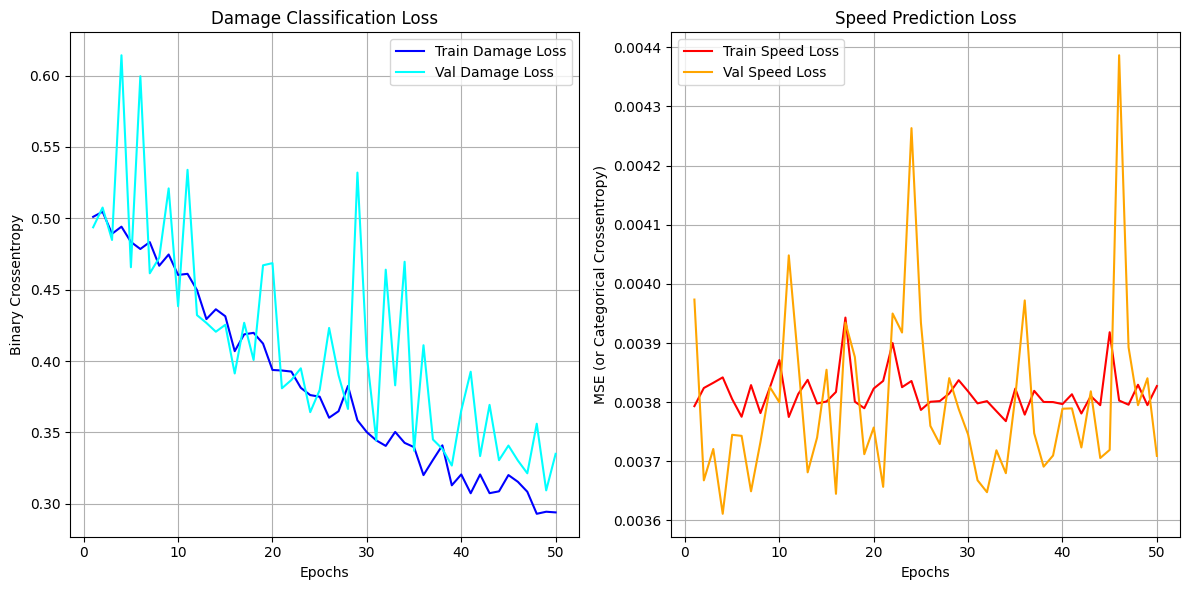

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    history_dict = history.history
    epochs = range(1, len(history_dict['loss']) + 1)

    plt.figure(figsize=(12, 6))

    # Plot damage classification loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history_dict['damage_output_loss'], label='Train Damage Loss', color='blue')
    plt.plot(epochs, history_dict['val_damage_output_loss'], label='Val Damage Loss', color='cyan')
    plt.title('Damage Classification Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)

    # Plot speed prediction loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history_dict['speed_output_loss'], label='Train Speed Loss', color='red')
    plt.plot(epochs, history_dict['val_speed_output_loss'], label='Val Speed Loss', color='orange')
    plt.title('Speed Prediction Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE (or Categorical Crossentropy)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
plot_training_history(history)

In [ ]:
history = adversarial_model.fit(
    input_train,
    {'damage_output': actual_outputs_train, 'speed_output': speed_labels_train},
    validation_data=(input_test, {'damage_output': actual_outputs_test, 'speed_output': speed_labels_test}),
    epochs=100,
    batch_size=64
)



Epoch 1/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - damage_output_Recall: 0.9181 - damage_output_accuracy: 0.8614 - damage_output_loss: 0.3190 - loss: 0.3228 - speed_output_loss: 0.0038 - speed_output_mse: 0.0038 - val_damage_output_Recall: 0.9547 - val_damage_output_accuracy: 0.8691 - val_damage_output_loss: 0.3090 - val_loss: 0.3132 - val_speed_output_loss: 0.0037 - val_speed_output_mse: 0.0037
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - damage_output_Recall: 0.9288 - damage_output_accuracy: 0.8741 - damage_output_loss: 0.3033 - loss: 0.3071 - speed_output_loss: 0.0038 - speed_output_mse: 0.0038 - val_damage_output_Recall: 0.9171 - val_damage_output_accuracy: 0.8685 - val_damage_output_loss: 0.3097 - val_loss: 0.3139 - val_speed_output_loss: 0.0038 - val_speed_output_mse: 0.0038
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - damage_output_Recall: 0.9363 - damage_output_accuracy: 0.8881 - damage_output_loss: 0.2689 - loss: 0.2726 - speed_output_loss: 0.0037 - 

TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred_prob = adversarial_model.predict(input_test)

# Access the damage prediction output (first element in the list)
damage_pred_prob = y_pred_prob[0]  # Assuming damage output is the first element

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5
y_pred = (damage_pred_prob > threshold).astype(int)

# Calculate the metrics
accuracy = accuracy_score(actual_outputs_test, y_pred)
recall = recall_score(actual_outputs_test, y_pred)
f1 = f1_score(actual_outputs_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.8921
Test Recall: 0.8957
Test F1 Score: 0.9161


In [ ]:

# Save the model to the specified folder
adversarial_model.save('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/adversarial_lstm_model_baseline_carnew.keras')


In [ ]:

# Load the saved model
model = keras.models.load_model('/content/drive/Othercomputers/My PC/GDrive/CEE286_Project/trained_models/adversarial_lstm_model_baseline_carnew.keras', compile=False)

# Compile the model (if needed)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy' , 'recall'])



TypeError: <class 'keras.src.models.functional.Functional'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': None}.

Exception encountered: Could not locate class 'GradientReversalLayer'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': None, 'class_name': 'GradientReversalLayer', 'config': {'name': 'gradient_reversal_layer_2', 'hp_lambda': 0.01, 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 139320716103696}}, 'registered_name': 'GradientReversalLayer', 'build_config': {'input_shape': [None, 5]}, 'name': 'gradient_reversal_layer_2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 5], 'dtype': 'float32', 'keras_history': ['features', 0, 0]}}], 'kwargs': {}}]}

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

y_pred_prob = model.predict(input_test)

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Calculate the metrics
accuracy = accuracy_score(actual_outputs_test, y_pred)
recall = recall_score(actual_outputs_test, y_pred)
f1 = f1_score(actual_outputs_test, y_pred)


print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Test Accuracy: 0.8820
Test Recall: 0.8855
Test F1 Score: 0.9080


In [ ]:

# Evaluate the model on the training data
train_loss, train_accuracy, train_recall = model.evaluate(input_train, actual_outputs_train, verbose=0)

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Recall: {train_recall:.4f}")

#Calculate training F1 score
y_pred_prob_train = model.predict(input_train)
y_pred_train = (y_pred_prob_train > threshold).astype(int)
train_f1 = f1_score(actual_outputs_train, y_pred_train)
print(f"Training F1 Score: {train_f1:.4f}")


Training Loss: 0.1568
Training Accuracy: 0.9373
Training Recall: 0.9384
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Training F1 Score: 0.9500
